### **K-means cluster with house dataset**

In [ ]:
#connect google driver
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

Load houses data


In [ ]:
houses = pd.read_csv('/content/gdrive/MyDrive/MachineLearning/Sampledata/.csv')
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#shorten data for faster processing
num_columns = houses.shape[1]
x = houses.drop(houses.iloc[:, 2:num_columns], axis=1).values
newDF = houses.drop(houses.iloc[:, 2:num_columns], axis=1)
x

array([[-122.23,   37.88],
       [-122.22,   37.86],
       [-122.24,   37.85],
       ...,
       [-121.22,   39.43],
       [-121.32,   39.43],
       [-121.24,   39.37]])

Elbow method for best K

In [ ]:
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

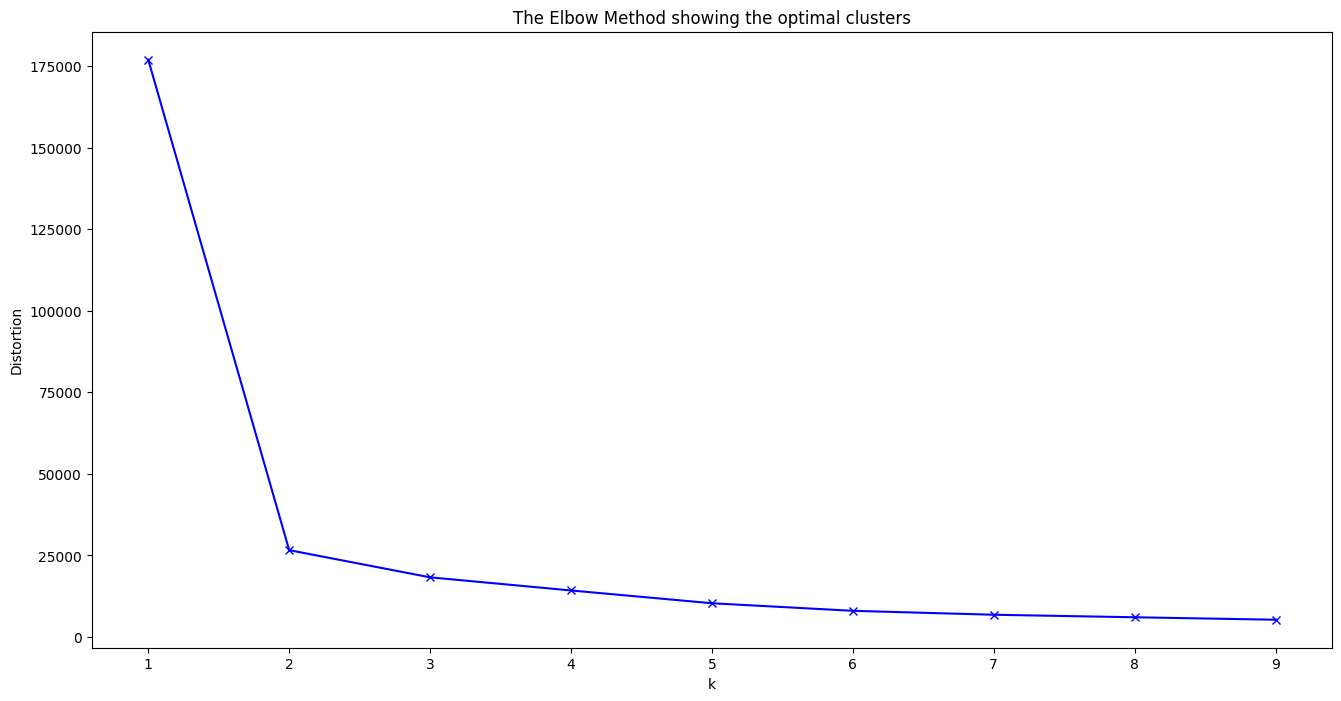

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

=> choose 3

In [ ]:
# Standardize X
std = StandardScaler()
transformed = std.fit_transform(x)

In [ ]:
# define kmeans function
def kmeans(X,k=3,max_iterations=10000):
    # init random indexes for centroids
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    # find the nearest centroid for each item in X using euclidean method
    P = np.argmin(cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        # recalculate centroids using mean
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        tmp = np.argmin(cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return P

In [ ]:
P = kmeans(transformed, 3)

In [ ]:
assert len(newDF) == len(P)

<function matplotlib.pyplot.show(close=None, block=None)>

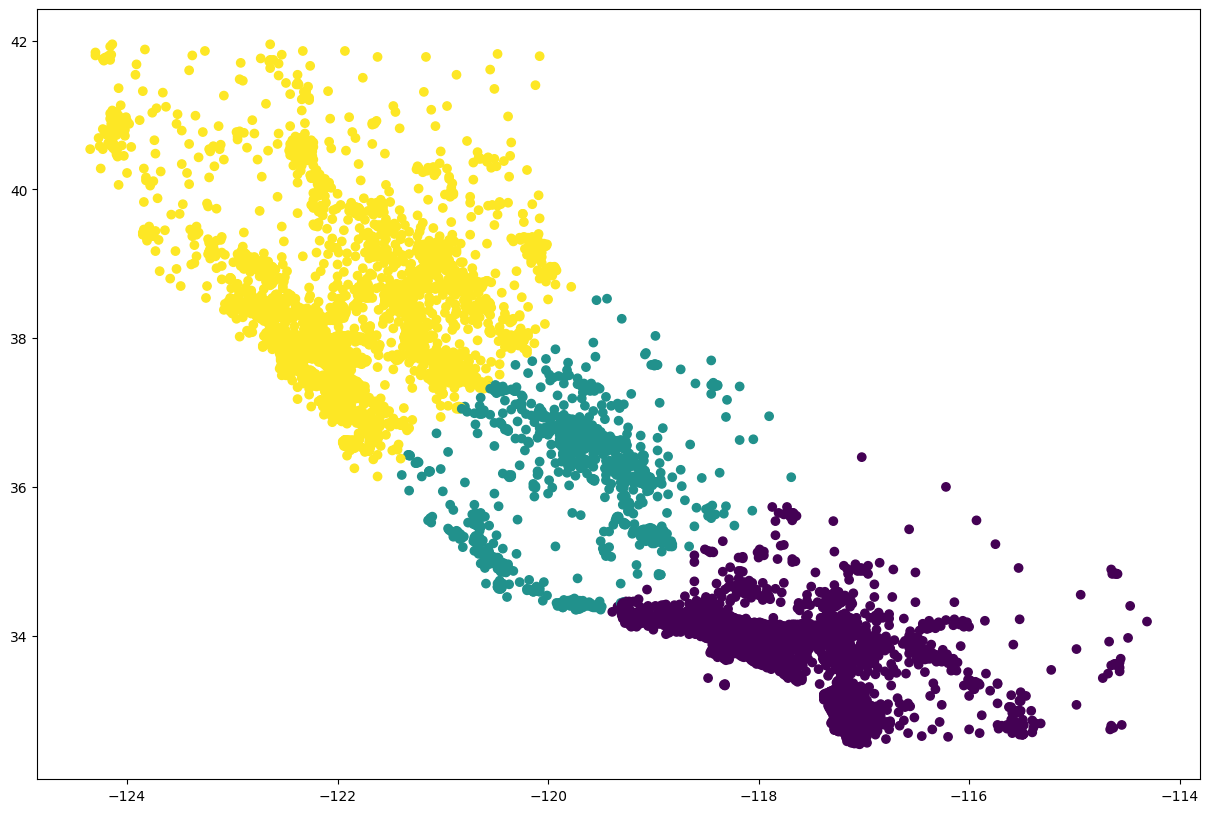

In [ ]:
inverse_data = std.inverse_transform(transformed)
plt.figure(figsize=(15,10))
plt.scatter(inverse_data[:, 0], inverse_data[:, 1], c=P)
plt.show